In [86]:
import json
import pandas as pd
import folium
import googlemaps
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rc 
from urllib.request import urlopen 
from bs4 import BeautifulSoup
import requests

In [87]:
#문제2


df = pd.read_csv("./data/CARD_SUBWAY_MONTH_202108.csv", encoding= "utf-8")
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20210801,중앙선,회기,10269,10305,20210804,NaN
20210801,일산선,마두,2306,2354,20210804,NaN
20210801,일산선,정발산,3334,3307,20210804,NaN
20210801,일산선,주엽,3047,3044,20210804,NaN
20210801,일산선,대화,4520,4151,20210804,NaN
...,...,...,...,...,...,...
20210831,5호선,개화산,4889,4725,20210903,NaN
20210831,과천선,선바위,7498,6443,20210903,NaN
20210831,1호선,서울역,35669,33406,20210903,NaN
20210831,1호선,동묘앞,5809,6035,20210903,NaN


In [88]:
df = df.reset_index()
df.drop('등록일자', axis=1, inplace=True)
df.columns = ['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210801,중앙선,회기,10269,10305,20210804
1,20210801,일산선,마두,2306,2354,20210804
2,20210801,일산선,정발산,3334,3307,20210804
3,20210801,일산선,주엽,3047,3044,20210804
4,20210801,일산선,대화,4520,4151,20210804


In [89]:
#문제 3

df = df.pivot_table(index="노선명")
df.loc[:,"사용일자"] = pd.to_datetime(df["사용일자"], format='%Y%m%d')
df.loc[:,"등록일자"] = pd.to_datetime(df["등록일자"], format='%Y%m%d')
df.head()

,등록일자,사용일자,승차총승객수,하차총승객수
노선명,,,,
1호선,2021-08-25,2021-08-16,15905.774194,15515.777419
2호선,2021-08-25,2021-08-16,19243.232903,19387.313548
3호선,2021-08-25,2021-08-16,10950.250720,10899.637848
4호선,2021-08-25,2021-08-16,13276.910670,13355.457816
5호선,2021-08-25,2021-08-16,8136.934908,8104.860023


In [92]:
#문제 4

df["승하차승객차이"] = (
    np.abs(df["승차총승객수"] - df["하차총승객수"]) 
)

df.drop('등록일자', axis=1, inplace=True)
df.drop('사용일자', axis=1, inplace=True)
df

,승차총승객수,하차총승객수,승하차승객차이
노선명,,,
1호선,15905.774194,15515.777419,389.996774
2호선,19243.232903,19387.313548,144.080645
3호선,10950.250720,10899.637848,50.612872
4호선,13276.910670,13355.457816,78.547146
5호선,8136.934908,8104.860023,32.074885
6호선,6299.947504,6207.831325,92.116179
7호선,9855.896268,9730.746363,125.149905
8호선,7891.434535,7974.552182,83.117647
9호선,7827.827097,7947.772903,119.945806


In [93]:
# 문제5 

df_sort = df.sort_values(by='승하차승객차이',ascending=False)
df_sort.head()

,승차총승객수,하차총승객수,승하차승객차이
노선명,,,
공항철도 1호선,5126.380184,4701.794931,424.585253
1호선,15905.774194,15515.777419,389.996774
분당선,7585.986854,7825.137089,239.150235
일산선,7922.594249,7704.731629,217.862620
2호선,19243.232903,19387.313548,144.080645


In [96]:
#문제 6


df_sort1 = df.sort_values(by=['승차총승객수'],ascending=False)
df_sort1.head()


,승차총승객수,하차총승객수,승하차승객차이
노선명,,,
2호선,19243.232903,19387.313548,144.080645
1호선,15905.774194,15515.777419,389.996774
4호선,13276.910670,13355.457816,78.547146
3호선,10950.250720,10899.637848,50.612872
경인선,10366.704839,10224.158065,142.546774


In [75]:
#문제 7
data = pd.read_csv("./data/CARD_SUBWAY_MONTH_202108.csv", encoding= "utf-8")
data.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20210801,중앙선,회기,10269,10305,20210804,NaN
20210801,일산선,마두,2306,2354,20210804,NaN
20210801,일산선,정발산,3334,3307,20210804,NaN
20210801,일산선,주엽,3047,3044,20210804,NaN
20210801,일산선,대화,4520,4151,20210804,NaN


In [76]:


data = data.reset_index()
data.drop('등록일자', axis=1, inplace=True)
data.columns = ['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자']



data1 = data.pivot_table(index="역명")
data1.drop('등록일자', axis=1, inplace=True)
data1.drop('사용일자', axis=1, inplace=True)
data1.head()

,승차총승객수,하차총승객수
역명,,
4.19민주묘지,2274.419355,2126.612903
가능,5222.516129,5034.967742
가락시장,6080.548387,6305.516129
가산디지털단지,21866.080645,22775.016129
가양,15095.967742,14729.193548


In [104]:
data1['승차총승객수'] = data1['승차총승객수'].astype(int)
data1['하차총승객수'] = data1['하차총승객수'].astype(int)
data1

,승차총승객수,하차총승객수
역명,,
4.19민주묘지,2274,2126
가능,5222,5034
가락시장,6080,6305
가산디지털단지,21866,22775
가양,15095,14729
...,...,...
회기,18083,17670
회룡,9643,9580
회현(남대문시장),16210,16997


In [105]:
# 문제8




data_sort = data1.sort_values(by='승차총승객수',ascending=False)
data_sort.head(5)

,승차총승객수,하차총승객수
역명,,
강남,60474,58682
신림,48503,47352
구로디지털단지,42945,43209
서울대입구(관악구청),36171,35656
삼성(무역센터),34718,34750


In [142]:
#문제9

df = pd.read_csv("./data/CARD_SUBWAY_MONTH_202108.csv", encoding= "utf-8")
df = df.reset_index()
df.drop('등록일자', axis=1, inplace=True)
df.columns = ['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
df.head()

df.drop('등록일자', axis=1, inplace=True)
df.drop('사용일자', axis=1, inplace=True)



df
 

,노선명,역명,승차총승객수,하차총승객수
0,중앙선,회기,10269,10305
1,일산선,마두,2306,2354
2,일산선,정발산,3334,3307
3,일산선,주엽,3047,3044
4,일산선,대화,4520,4151
...,...,...,...,...
18633,5호선,개화산,4889,4725
18634,과천선,선바위,7498,6443
18635,1호선,서울역,35669,33406
18636,1호선,동묘앞,5809,6035


In [143]:
data1 = df.pivot_table(index=["역명"], values=["승차총승객수", "하차총승객수"], aggfunc= [np.sum, np.mean, np.std])

data1

sum                   mean                         std  \
            승차총승객수   하차총승객수        승차총승객수        하차총승객수        승차총승객수   
역명                                                                      
4.19민주묘지     70507    65925   2274.419355   2126.612903    373.593877   
가능          161898   156084   5222.516129   5034.967742   1134.607124   
가락시장        376994   390942   6080.548387   6305.516129   1939.749956   
가산디지털단지    1355697  1412051  21866.080645  22775.016129  15270.379943   
가양          467975   456605  15095.967742  14729.193548   4373.801127   
...            ...      ...           ...           ...           ...   
회기          560588   547771  18083.483871  17670.032258   3766.352204   
회룡          298956   296989   9643.741935   9580.290323   2208.369307   
회현(남대문시장)   502516   526925  16210.193548  16997.580645   5413.747269   
효창공원앞       223199   216659   3599.983871   3494.500000   1901.070341   
흑석(중앙대입구)   174931   183305   5642.935484   5913.064516   1563.297241   

                         
                 하차총승객수  
역명                       
4.19민주묘지     410.761705  
가능          1121.264033  
가락시장        1849.094894  
가산디지털단지    14499.365939  
가양          4240.535174  
...                 ...  
회기          3625.268335  
회룡          2207.006966  
회현(남대문시장)   5673.240266  
효창공원앞       1539.828868  
흑석(중앙대입구)   1679.679690  

[520 rows x 6 columns]

In [144]:
data1.columns

MultiIndex([( 'sum', '승차총승객수'),
            ( 'sum', '하차총승객수'),
            ('mean', '승차총승객수'),
            ('mean', '하차총승객수'),
            ( 'std', '승차총승객수'),
            ( 'std', '하차총승객수')],
           )

In [145]:
data1.columns = data1.columns.droplevel([0]) # 다중 컬럼에서 특정 컬럼 제거 
data1.columns

Index(['승차총승객수', '하차총승객수', '승차총승객수', '하차총승객수', '승차총승객수', '하차총승객수'], dtype='object')

In [146]:
#문제10

col = ["총승차", "총하차", "일평균승차",  "일평균하차", "승차표준편차",  "하차표준편차" ]
data1.columns = col
data1

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
4.19민주묘지,70507,65925,2274.419355,2126.612903,373.593877,410.761705
가능,161898,156084,5222.516129,5034.967742,1134.607124,1121.264033
가락시장,376994,390942,6080.548387,6305.516129,1939.749956,1849.094894
가산디지털단지,1355697,1412051,21866.080645,22775.016129,15270.379943,14499.365939
가양,467975,456605,15095.967742,14729.193548,4373.801127,4240.535174
...,...,...,...,...,...,...
회기,560588,547771,18083.483871,17670.032258,3766.352204,3625.268335
회룡,298956,296989,9643.741935,9580.290323,2208.369307,2207.006966
회현(남대문시장),502516,526925,16210.193548,16997.580645,5413.747269,5673.240266


In [147]:
#문제11
data2 = data1.sort_values(by='총승차',ascending=False)
data2.head(5)

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
강남,1874711,1819150,60474.548387,58682.258065,18723.322383,18262.922793
잠실(송파구청),1865925,1886470,30095.564516,30426.935484,20723.699517,19816.862422
고속터미널,1660283,1640472,17852.505376,17639.483871,10305.355931,9924.724468
서울역,1572730,1541382,9891.383648,9694.226415,10756.755773,10541.777127
홍대입구,1525530,1553713,16058.210526,16354.873684,17306.631205,17690.730638


In [148]:
#문제12
data3 = data1.sort_values(by='승차표준편차',ascending=False)
data3.head(5)

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
잠실(송파구청),1865925,1886470,30095.564516,30426.935484,20723.699517,19816.862422
선릉,1461878,1458286,23578.677419,23520.741935,19241.780971,15615.806441
강남,1874711,1819150,60474.548387,58682.258065,18723.322383,18262.922793
신도림,1202149,1174705,19389.500000,18946.854839,17691.419244,17096.513503
홍대입구,1525530,1553713,16058.210526,16354.873684,17306.631205,17690.730638


In [150]:
# 문제13
data4 = data1.sort_values(by='승차표준편차',ascending=True)
data4.head(10)

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
지평,1852,2019,59.741935,65.129032,14.059321,12.914441
달월,2282,1577,73.612903,50.870968,23.931398,9.433069
임진강,912,686,29.419355,22.129032,25.718702,22.685887
세종대왕릉,7758,7768,250.258065,250.580645,27.029574,32.417870
오빈,7963,7851,256.870968,253.258065,31.290831,37.001773
원덕,9789,9051,315.774194,291.967742,31.410943,36.381757
백양리,4068,3495,131.225806,112.741935,33.982064,28.904403
굴봉산,4936,4416,159.225806,142.451613,37.863535,33.719271
신원,5910,4734,190.645161,152.709677,40.725543,22.803791


In [186]:
#문제14


df = pd.read_csv("./data/CARD_SUBWAY_MONTH_202108.csv", encoding= "utf-8")
df = df.reset_index()
df.drop('등록일자', axis=1, inplace=True)
df.columns = ['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
df.head()




df = df.loc[df['역명'] == '강남']


df












,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
535,20210801,2호선,강남,22794,21657,20210804
1172,20210802,2호선,강남,70147,68166,20210805
1271,20210803,2호선,강남,70995,68779,20210806
1981,20210804,2호선,강남,70275,68322,20210807
2477,20210805,2호선,강남,70718,68542,20210808
3006,20210806,2호선,강남,72165,69679,20210809
3676,20210807,2호선,강남,44891,43388,20210810
4339,20210808,2호선,강남,24489,23435,20210811
5318,20210809,2호선,강남,73489,71365,20210812
5947,20210810,2호선,강남,74307,72076,20210813


In [187]:
#문제15

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 535 to 18087
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    31 non-null     int64 
 1   노선명     31 non-null     object
 2   역명      31 non-null     object
 3   승차총승객수  31 non-null     int64 
 4   하차총승객수  31 non-null     int64 
 5   등록일자    31 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.7+ KB


In [188]:
#문제16

df.loc[:,"사용일자"] = pd.to_datetime(df["사용일자"], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 535 to 18087
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    31 non-null     datetime64[ns]
 1   노선명     31 non-null     object        
 2   역명      31 non-null     object        
 3   승차총승객수  31 non-null     int64         
 4   하차총승객수  31 non-null     int64         
 5   등록일자    31 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.7+ KB


In [189]:
#문제17


import matplotlib.pyplot as plt 
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False
rc("font", family="Malgun Gothic ") 
%matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

Text(0, 0.5, '승차총승객수')

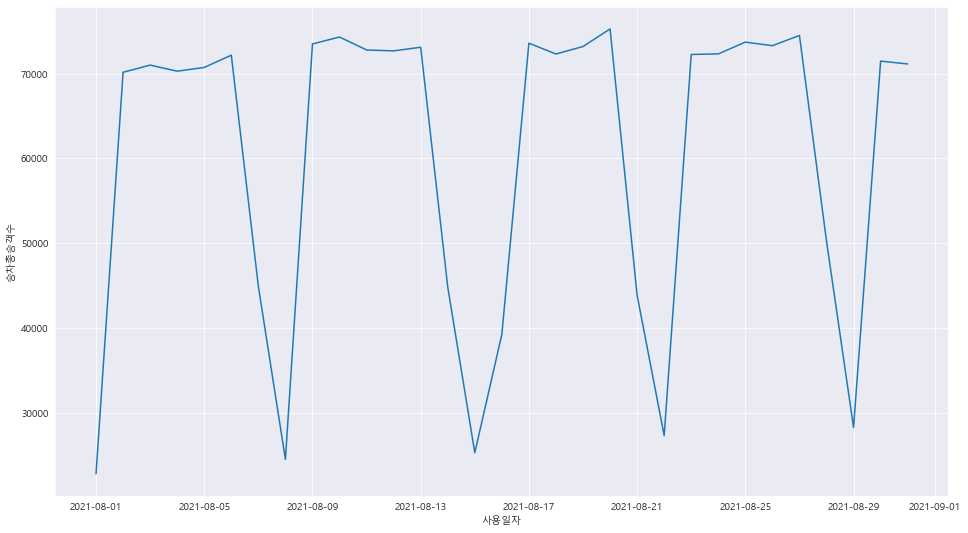

In [190]:
#문제18






plt.figure(figsize=(16, 9))
sns.lineplot(y=df['승차총승객수'], x=df['사용일자'])
plt.xlabel('사용일자')
plt.ylabel('승차총승객수')

In [191]:
df_gangnam = df
df_gangnam.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
535,2021-08-01,2호선,강남,22794,21657,20210804
1172,2021-08-02,2호선,강남,70147,68166,20210805
1271,2021-08-03,2호선,강남,70995,68779,20210806
1981,2021-08-04,2호선,강남,70275,68322,20210807
2477,2021-08-05,2호선,강남,70718,68542,20210808


In [183]:
#문제19

df = pd.read_csv("./data/CARD_SUBWAY_MONTH_202108.csv", encoding= "utf-8")
df = df.reset_index()
df.drop('등록일자', axis=1, inplace=True)
df.columns = ['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
df.head()




df_paldang = df.loc[df['역명'] == '팔당']


df_paldang.head()






,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
590,20210801,중앙선,팔당,978,928,20210804
623,20210802,중앙선,팔당,758,753,20210805
1214,20210803,중앙선,팔당,838,792,20210806
1928,20210804,중앙선,팔당,779,801,20210807
2432,20210805,중앙선,팔당,848,827,20210808


In [184]:
#문제20

In [185]:
df_paldang["팔당 * 10"] = (
   df_paldang["승차총승객수"] * 10
)

df_paldang.loc[:,"사용일자"] = pd.to_datetime(df_paldang["사용일자"], format='%Y%m%d')
df_paldang.loc[:,"등록일자"] = pd.to_datetime(df_paldang["등록일자"], format='%Y%m%d')


df_paldang.head()

C:\Users\gigic\AppData\Local\Temp/ipykernel_13136/1432011125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paldang["팔당 * 10"] = (
C:\Users\gigic\miniconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,팔당 * 10
590,2021-08-01,중앙선,팔당,978,928,2021-08-04,9780
623,2021-08-02,중앙선,팔당,758,753,2021-08-05,7580
1214,2021-08-03,중앙선,팔당,838,792,2021-08-06,8380
1928,2021-08-04,중앙선,팔당,779,801,2021-08-07,7790
2432,2021-08-05,중앙선,팔당,848,827,2021-08-08,8480


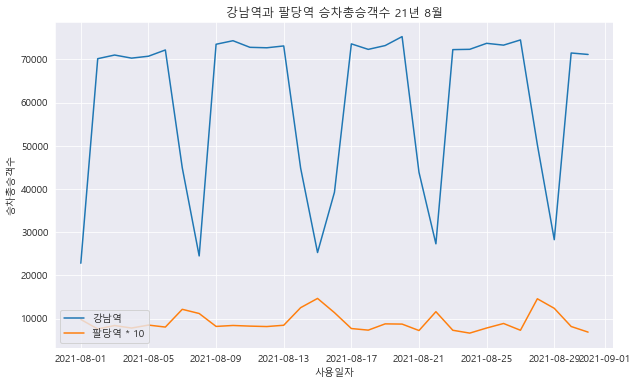

In [198]:
plt.figure(figsize=(10, 6))
plt.plot(df_gangnam['사용일자'], df_gangnam['승차총승객수'], label="강남역")
plt.plot(df_paldang['사용일자'],df_paldang['팔당 * 10'], label="팔당역 * 10")
plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("강남역과 팔당역 승차총승객수 21년 8월")
plt.xlabel("사용일자")
plt.ylabel("승차총승객수") 
plt.show()

    